In [ ]:
!nvidia-smi

Mon Feb 24 13:05:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Importing the data from ROBOFLOW

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DIzUH5u9GexGD5Ug0dNi")
project = rf.workspace("pothhole-344dd").project("pothole-detection-project-1dpiq-ogqm4")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 228MB/s]
New https://pypi.org/project/ultralytics/8.3.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Pothole-Detection-Project-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

/content


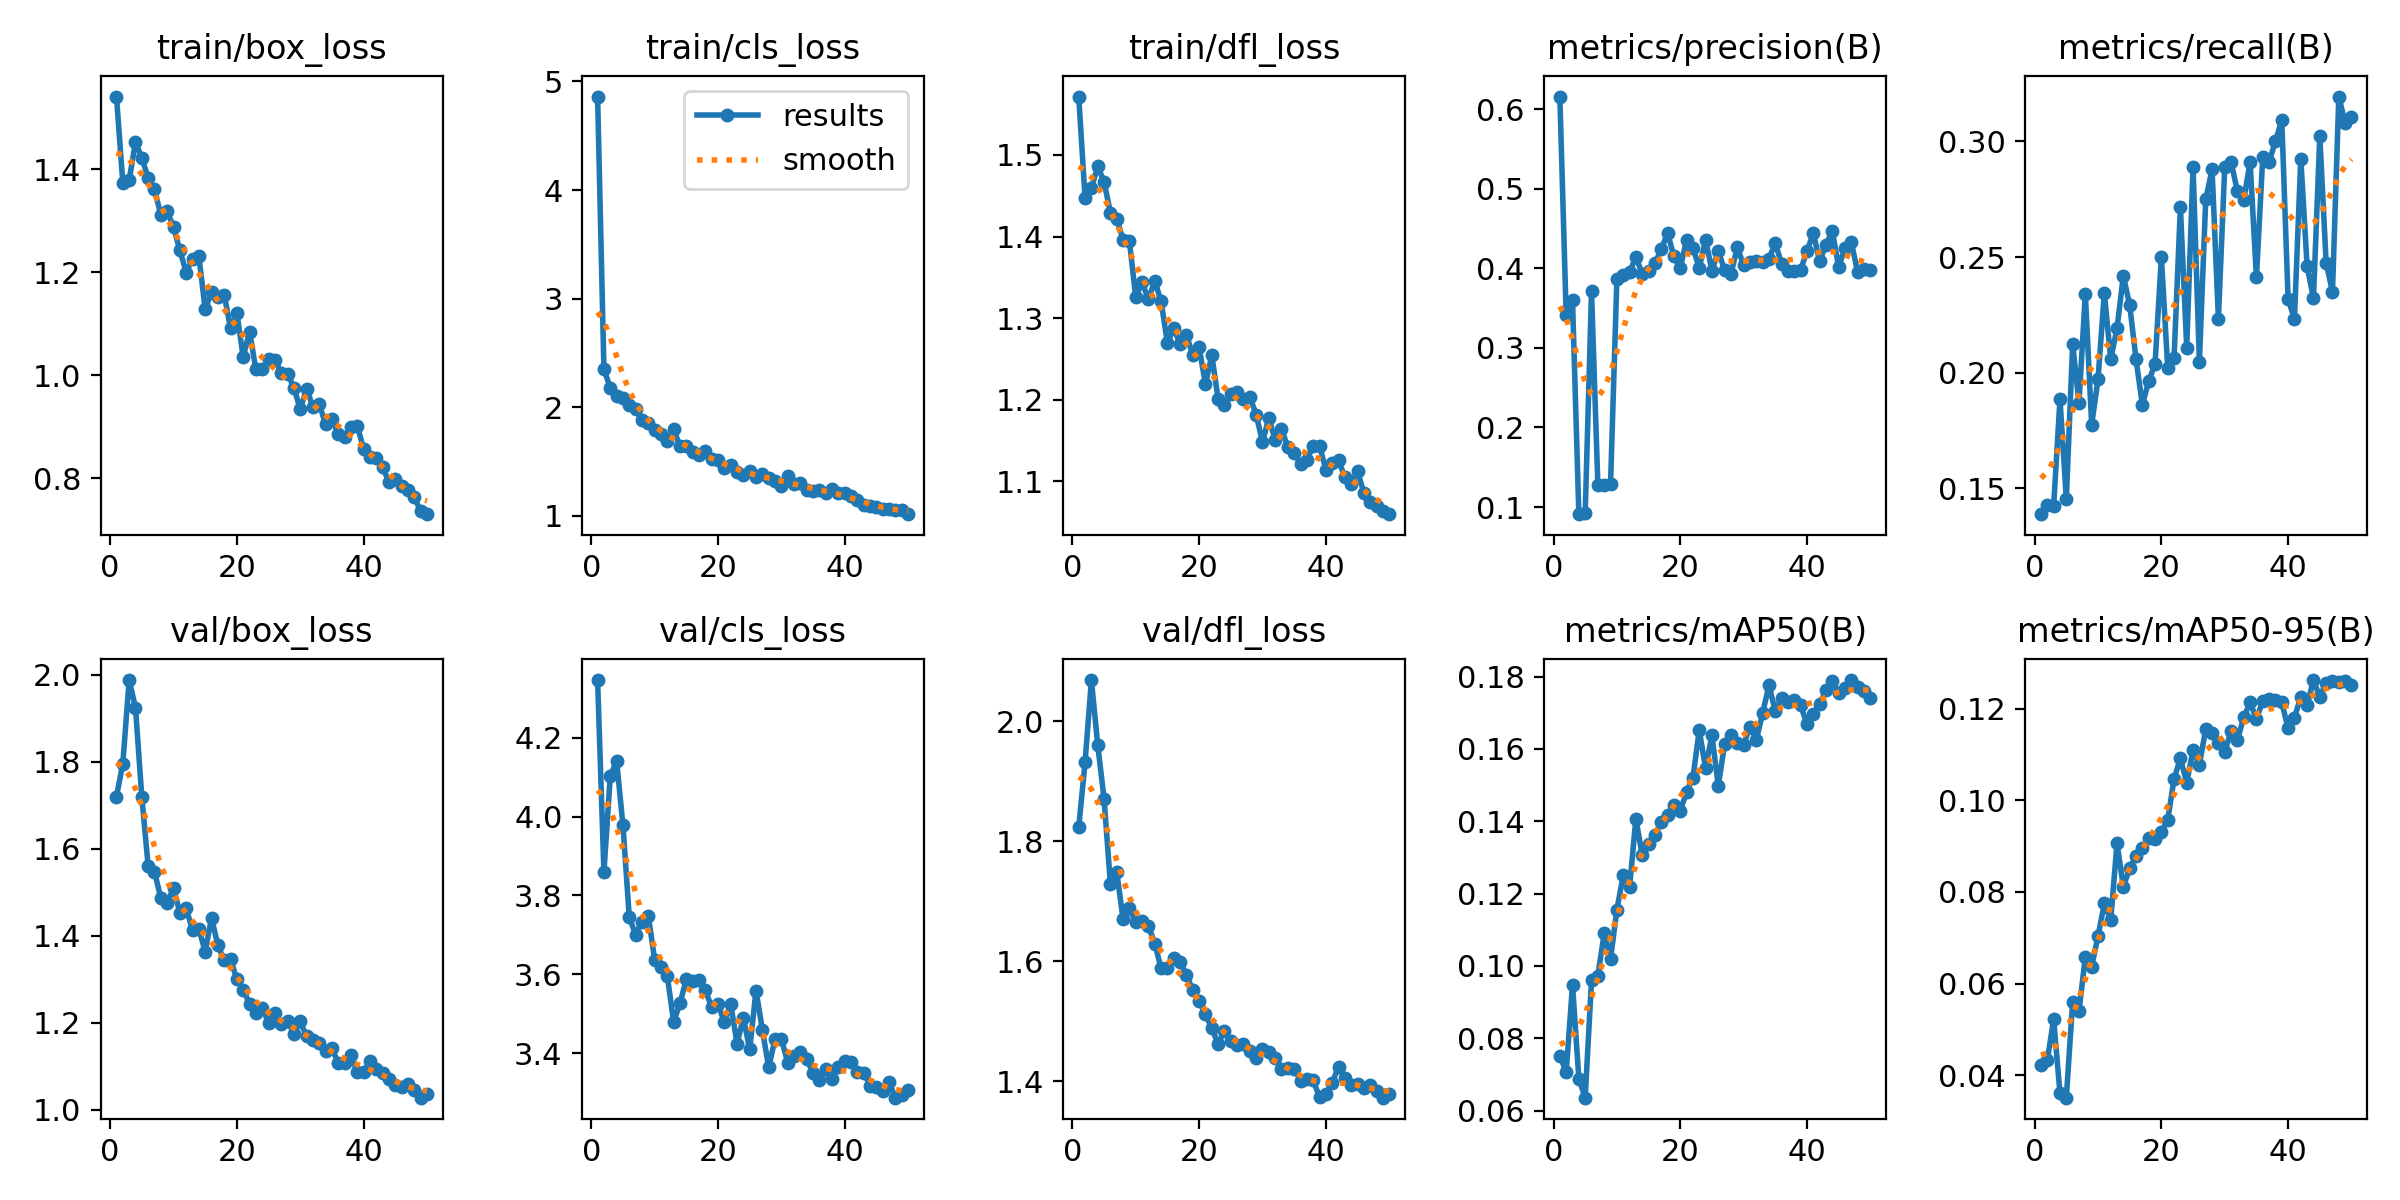

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


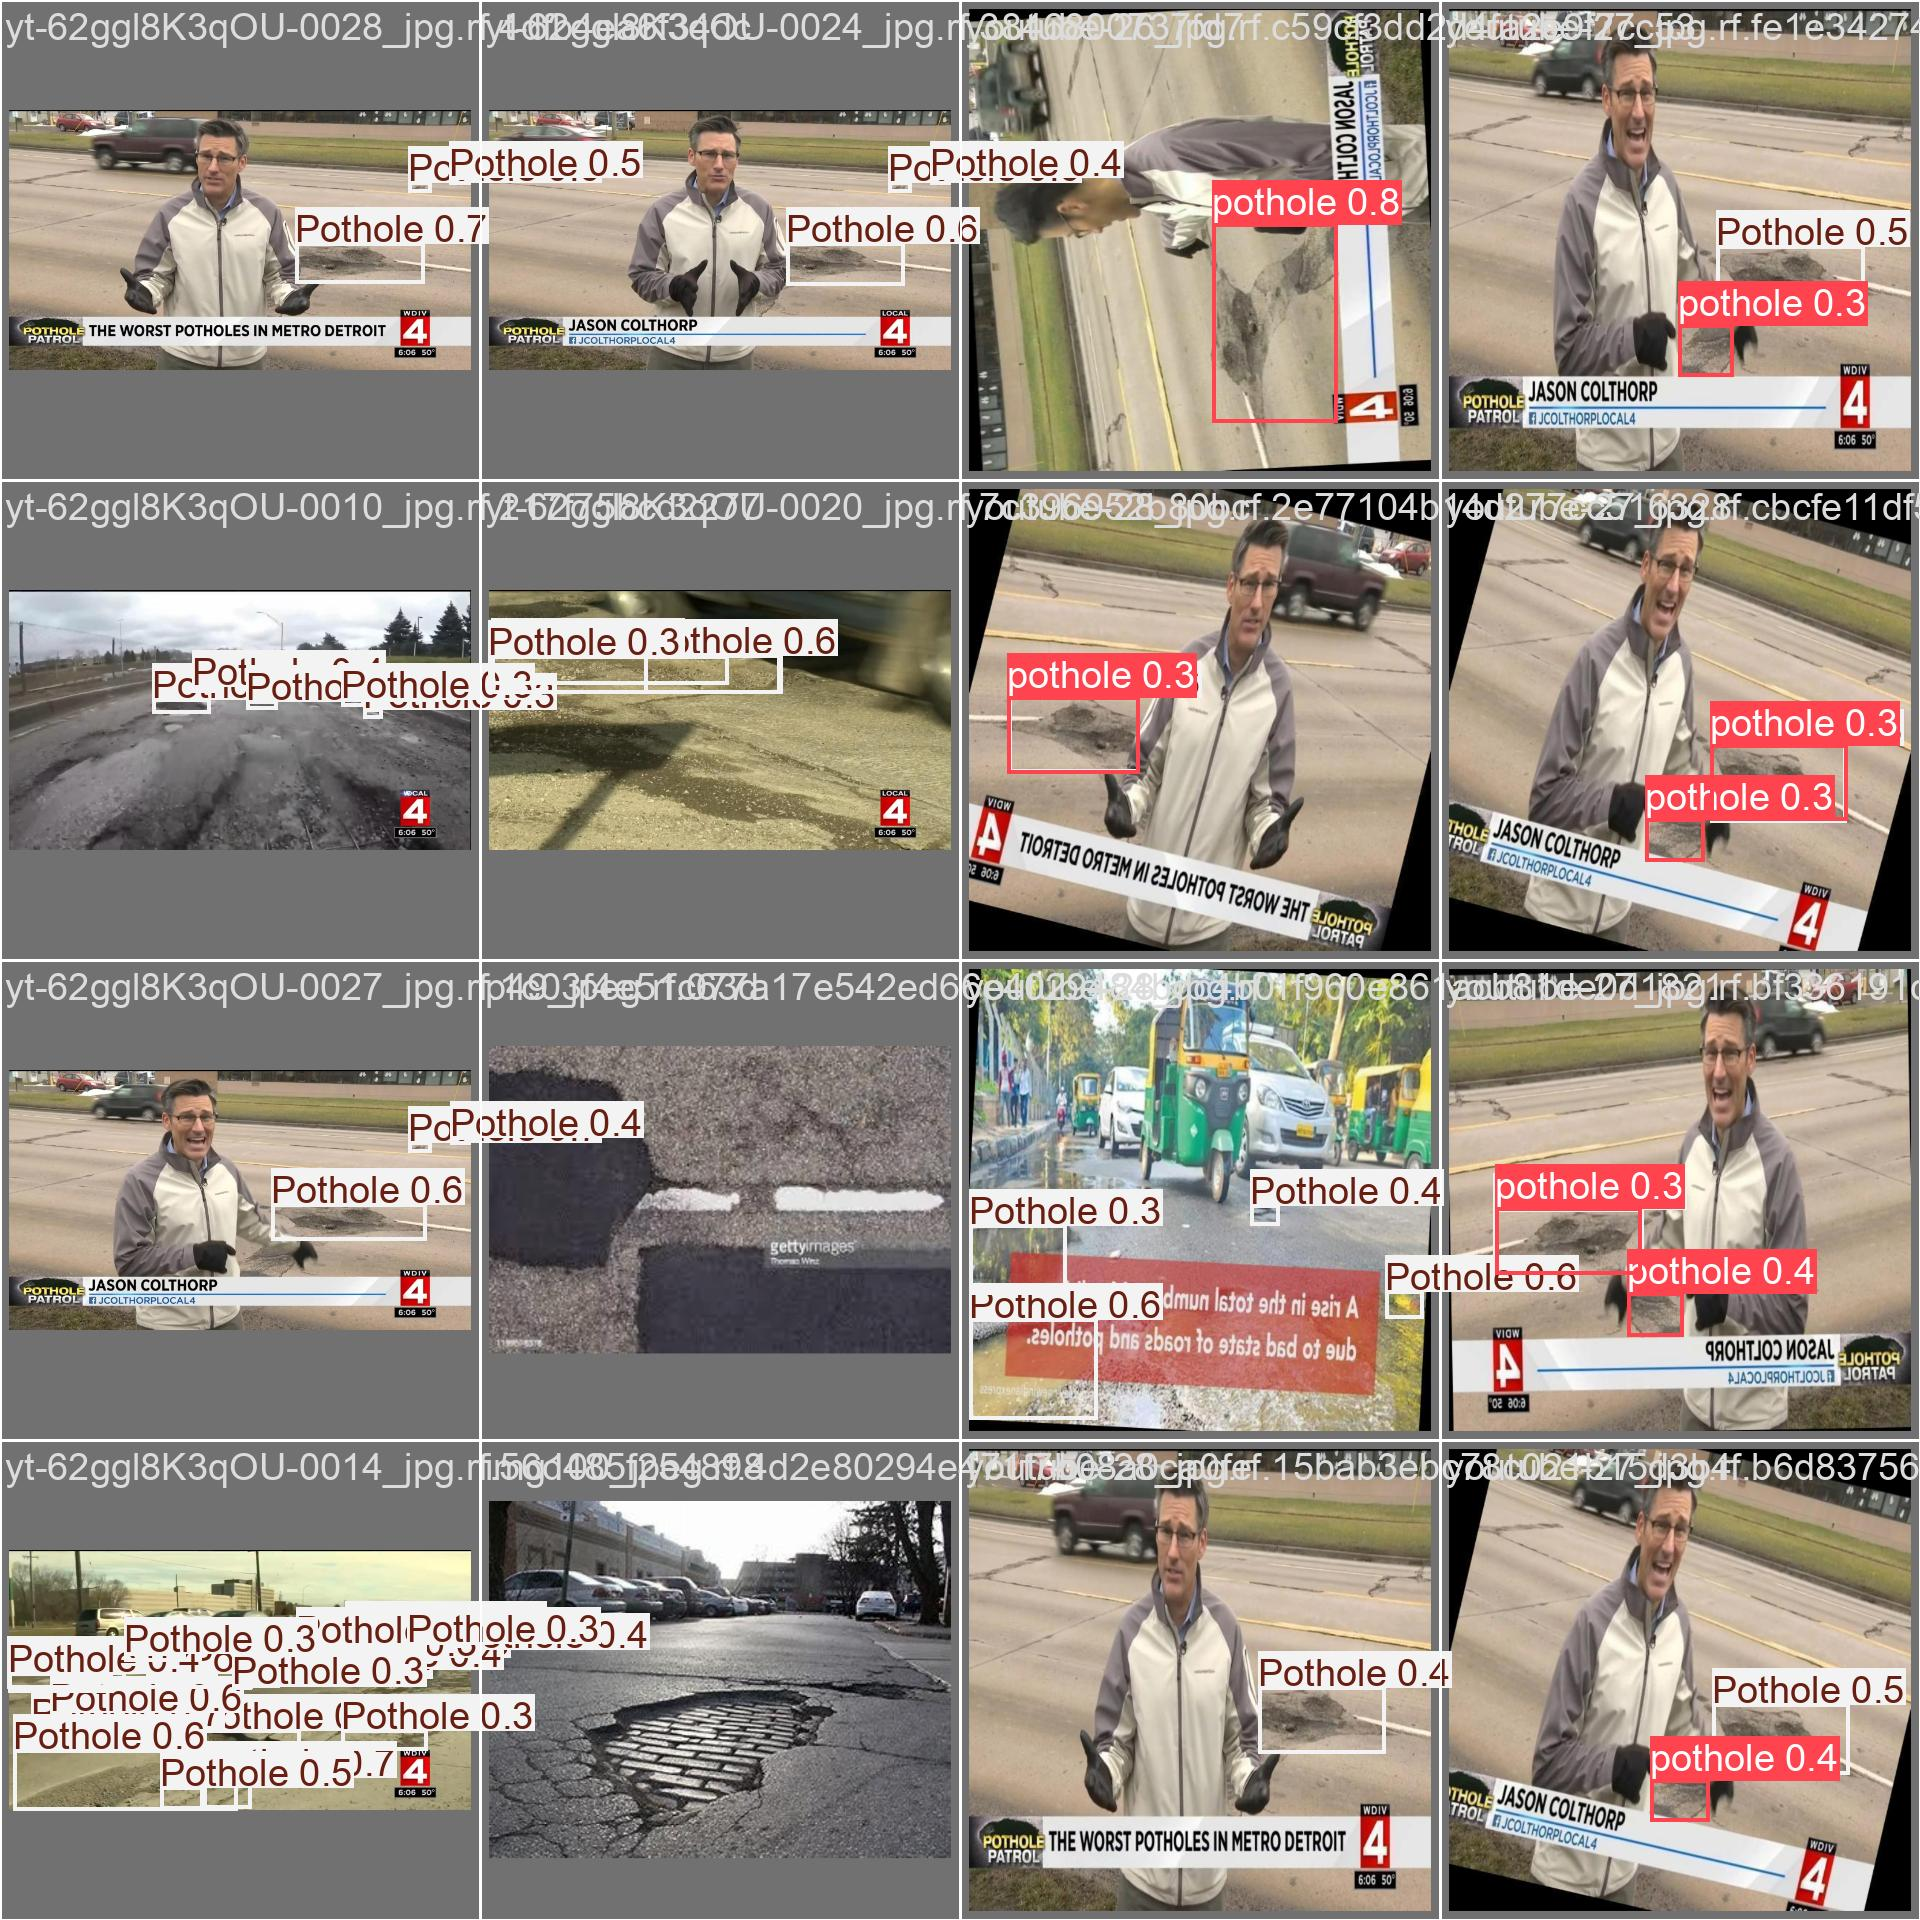

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Pothole-Detection-Project-1/valid/labels.cache... 437 images, 43 backgrounds, 0 corrupt: 100% 437/437 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:09<00:00,  2.96it/s]
                   all        437       1428      0.446      0.232      0.179      0.127
                     -         68        232          1          0     0.0251       0.01
               Pothole        156        473      0.396        0.7      0.375      0.272
Roboflow is an end-to-end computer vision platform that helps you         73        252          0          0          0          0
               pothole         99        471      0.388      0.227      0.315      0.226
Speed: 2.7ms preprocess, 13.0ms inference, 0.0ms loss, 1.6ms pos

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/375 /content/Pothole-Detection-Project-1/test/images/S8_jpeg.rf.fb12cab633f9299002cbc0796bc9bdb1.jpg: 608x800 1 Pothole, 39.8ms
image 2/375 /content/Pothole-Detection-Project-1/test/images/S8_jpeg_jpg.rf.a5da683031ba2d5c973fd9de1b1438ae.jpg: 800x800 1 Pothole, 23.5ms
image 3/375 /content/Pothole-Detection-Project-1/test/images/images164_jpg.rf.017832cd23ddfc1207ee385d1fdde595.jpg: 800x800 (no detections), 22.8ms
image 4/375 /content/Pothole-Detection-Project-1/test/images/images164_jpg.rf.56b98eccf47217b862040ec16f6a036c.jpg: 800x800 (no detections), 22.8ms
image 5/375 /content/Pothole-Detection-Project-1/test/images/images173_jpg.rf.3ff95c4c1c78060a3782f65f734a9695.jpg: 800x800 1 Pothole, 1 pothole, 22.8ms
image 6/375 /content/Pothole-Detection-Project-1/test/images/images173_jpg.rf.6273a474f8383a81

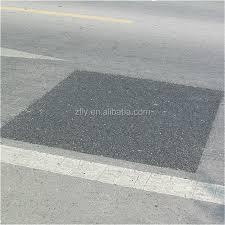

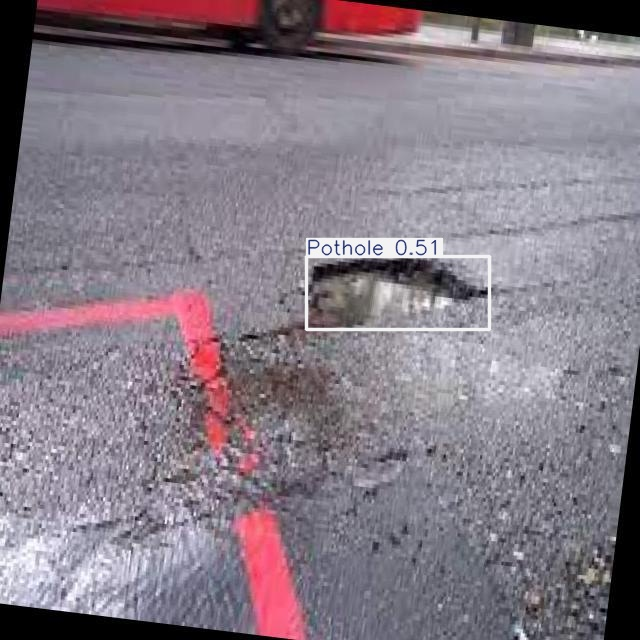

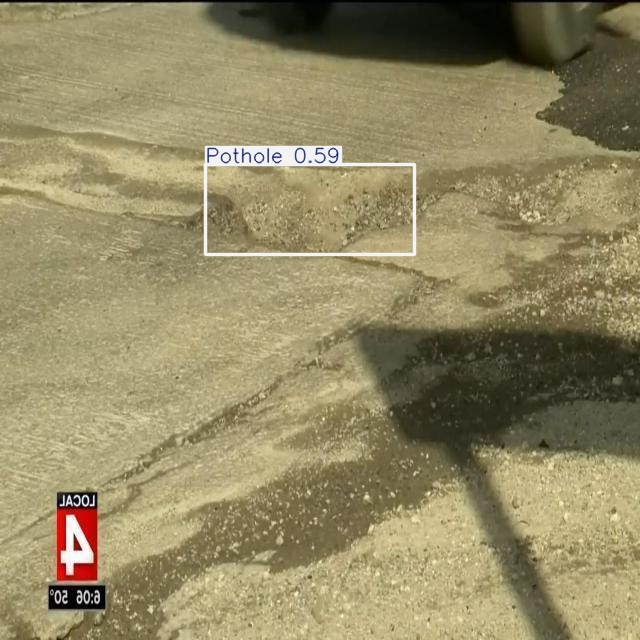

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")